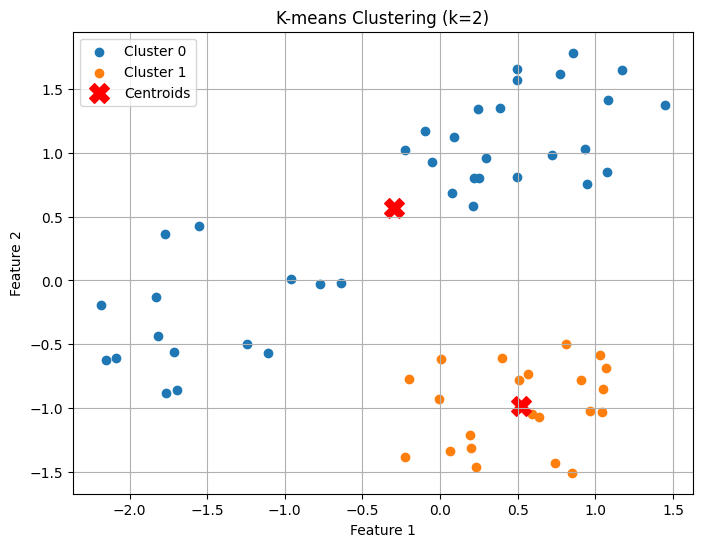

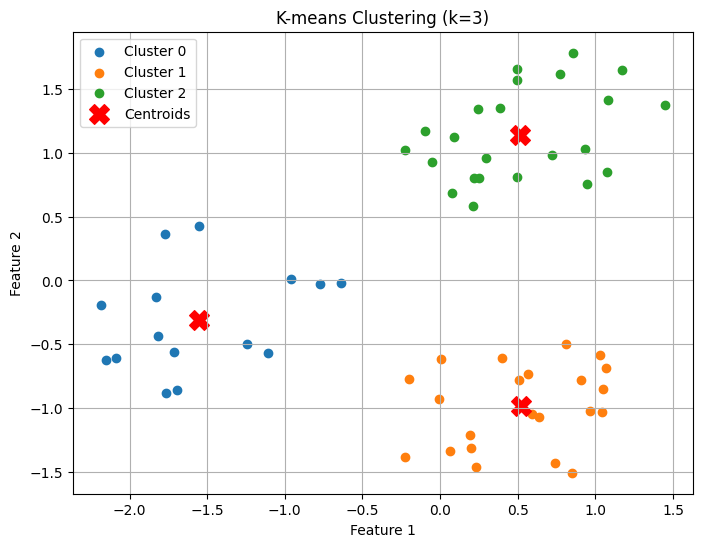

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "kmeans - kmeans_blobs.csv"
df = pd.read_csv(file_path)

# Assuming dataset has two numerical columns for clustering
X = df.iloc[:, :2].values  # Selecting first two columns for clustering

# Normalize the data
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X = normalize(X)

# K-means algorithm implementation
def kmeans(X, k, max_iters=100, tol=1e-4):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Compute new centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    
    return labels, centroids

# Function to plot clusters
def plot_clusters(X, labels, centroids, k):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f'K-means Clustering (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run K-means for k=2
labels_2, centroids_2 = kmeans(X, k=2)
plot_clusters(X, labels_2, centroids_2, k=2)

# Run K-means for k=3
labels_3, centroids_3 = kmeans(X, k=3)
plot_clusters(X, labels_3, centroids_3, k=3)